# PD Model

## Loading the Data and Selecting the Features

load libraries and data

In [3]:
import numpy as np
import pandas as pd

In [230]:
# use col 0 to be roll indexes 
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col =0)

In [231]:
loan_data_inputs_train.shape

(373028, 279)

In [232]:
pd.set_option('display.max_columns', None)
loan_data_inputs_train.head(1)

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status: Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,emp_length_int,term_int,earliest_cr_line_date,earliest_cr_line_date_day,mths_earliest_cr_line,loan_status_test,issue_d_string,mths_since_issue_d,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state: KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Verified,purpose:edu_sm_b_wedd_ren_en_mov_house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line_factor,annual_inc_factor,annual_i

### Select the Features

In [264]:
# we later on also select data for test set 
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade_A','grade_B','grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership:RENT_OTHER_NONE_ANY','home_ownership_OWN','home_ownership_MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state_NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state_TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status: Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose:educ_sm_b_wedd_ren_en_mov_house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status_f',
'initial_list_status_w',
'term:36',
'term:60',
'emp_length:0.0',
'emp_length:1.0',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10.0',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K']]

In [234]:
# names of the reference categories are stored in a list 
ref_categories = ['grade_G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status_Verified',
'purpose:educ_sm_b_wedd_ren_en_mov_house',
'initial_list_status_f',
'term:60',
'emp_length:0.0',
'mths_since_issue_d:>84',
'annual_inc:<20K']

In [238]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)

52

In [266]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
len(inputs_test.columns)

52

### Logistic Regression

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [241]:
reg = LogisticRegression()

In [242]:
reg.fit(inputs_train, loan_data_targets_train['good_bad'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [243]:
reg.intercept_

array([-0.0844])

In [244]:
reg.coef_

array([[ 2.1763,  1.4509,  0.9944,  0.6538,  0.3678,  0.1267,  0.0972,
         0.1953,  0.0866,  0.1332,  0.0638,  0.1431,  0.1165,  0.109 ,
         0.1232,  0.2076,  0.1867,  0.2478,  0.2817,  0.3146,  0.5458,
         0.0408, -0.0163,  0.2432,  0.1396,  0.1783,  0.2506,  0.0559,
         0.0194,  0.2285,  0.2924,  0.2535,  0.2307,  0.3402,  1.0993,
         0.8775,  0.775 ,  0.552 ,  0.3488,  0.0725, -0.1072,  0.4162,
         0.3986,  0.8476,  0.2735, -0.2968, -0.2119,  0.5614,  0.1979,
         0.367 ,  0.2253,  0.4696]])

In [249]:
feature_name = inputs_train.columns.values

In [250]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index +1
summary_table.loc[0] =['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [251]:
pd.set_option('display.max_rows', None)
summary_table

,Feature name,Coefficient
0,Intercept,-0.084405
1,grade_A,2.176299
2,grade_B,1.450940
3,grade_C,0.994351
4,grade_D,0.653780
5,grade_E,0.367792
6,grade_F,0.126697
7,home_ownership_OWN,0.097230
8,home_ownership_MORTGAGE,0.195281
9,addr_state:NM_VA,0.086599


### Build a Logistic regression Model with P-Values

obtain multi variant P values

In [252]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self,X,y):
        self.model.fit(X,y)
        
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(abs(np.diagonal(Cramer_Rao)))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [253]:
reg = LogisticRegression_with_p_values()

In [254]:
reg.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [255]:
#create summary table with p values
pd.set_option('display.max_rows', None)
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index +1
summary_table.loc[0] =['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [256]:
np.set_printoptions(precision=4,suppress=True)
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficient,p_values
0,Intercept,-0.084405,NaN
1,grade_A,2.176299,0.000000e+00
2,grade_B,1.450940,0.000000e+00
3,grade_C,0.994351,7.001591e-178
4,grade_D,0.653780,3.278514e-79
5,grade_E,0.367792,1.751996e-25
6,grade_F,0.126697,1.115266e-03
7,home_ownership_OWN,0.097230,1.150219e-06
8,home_ownership_MORTGAGE,0.195281,5.557711e-59
9,addr_state:NM_VA,0.086599,6.200566e-03


### PD Model Validation (Test)

In [267]:
y_hat_test = reg.model.predict(inputs_test)

The code essentially did:    
(1) multiplies the  values of the variables by the model coefficients, yields the log of odds of being good;    
(2) An exponent is raised to the power of the log of oddsL tields the odds of being good and the estimated probability of being good
(3) The estimated probabilities are categorised into being good or bad by applying a cut-off    

The default cut-off is 50%

In [282]:
y_hat_test_proba = reg.model.predict_proba(inputs_test)
#probability of being a good borrower
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [283]:
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [284]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)],axis = 1)

In [285]:
df_actual_predicted_probs.columns = ['loan_data_target_test', 'y_hat_testProba']
df_actual_predicted_probs.head()

,loan_data_target_test,y_hat_testProba
0,1,0.924309
1,1,0.892698
2,1,0.817885
3,1,0.941873
4,1,0.951103


In [298]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.tail()

,loan_data_target_test,y_hat_testProba,y_hat_test
115,1,0.875219,1
296284,1,0.953188,1
61777,0,0.958313,1
91763,1,0.958600,1
167512,1,0.942658,1


### Accurancy and Area under the Curve

In [305]:
tr = 0.55
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_testProba']>tr,1,0)

When we have tr = 0.55, the confusion matrix indicates a large propotion (11%) of false positive, which is not acceptable

In [307]:
pd.crosstab(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actural'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actural,,
0,0.000043,0.109225
1,0.000021,0.890711


In [309]:
(0.000043+0.890711)/1.0

0.890754

When the threshold is increased to 0.9, then the proportion of false positive decreased to 3%, with a cost of increased false negatve and decreased model accuracy.

It did reduced risk but also lost business

In [310]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_testProba']>tr,1,0)
pd.crosstab(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actural'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actural,,
0,0.077967,0.031301
1,0.397257,0.493475


In [311]:
(0.077967+0.493475)/1.0

0.571442

In [313]:
from sklearn.metrics import roc_curve, roc_auc_score

The first array contains *False Positive Rate*;    \
Second array contains *True Positive Rate*;   \
Third array contains *Thresholds*

In [314]:
roc_curve(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_testProba'])

(array([0.    , 0.    , 0.    , ..., 0.9999, 0.9999, 1.    ]),
 array([0.    , 0.    , 0.0002, ..., 1.    , 1.    , 1.    ]),
 array([1.9941, 0.9941, 0.9893, ..., 0.5211, 0.5065, 0.5052]))

#### Plot the ROC curve

In [317]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_target_test'],
                                df_actual_predicted_probs['y_hat_testProba'])

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

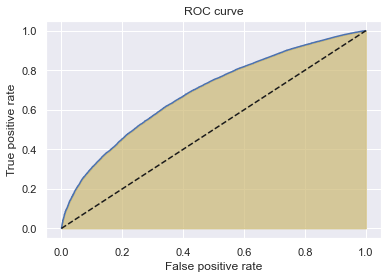

In [330]:
plt.plot(fpr,tpr)
plt.fill_between(fpr, tpr, alpha = 0.7, color = 'y')


plt.plot(fpr,fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [332]:
#calculate area under ROC curve
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_testProba'])
AUROC

0.6892110248141087

The usual interpretation is as follows:

|Interpretation | Area under the ROC curve|
| ------------- |:-------------:| 
|Bad |50%-60%|
|Poor | 60%-70% |
|Fair | 70%-80% |
|Good | 80%-90% |
|Excellent | 90%-100% |

### Evaluate model Performance
Gini and Kolmogorov-Smirnov

In [334]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_testProba')

In [335]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [336]:
#cumulative % of the total population:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1

#cumulative % of good borrowers
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_target_test'].cumsum()

#cumulative % of bad borrowers
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['Cumulative N Good']

In [337]:
df_actual_predicted_probs.head()

,index,loan_data_target_test,y_hat_testProba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,18097,0,0.505159,0,1,0,1
1,209353,1,0.506509,0,2,1,1
2,10876,0,0.521099,0,3,1,2
3,2808,0,0.539978,0,4,1,3
4,3667,1,0.540520,0,5,2,3


In [338]:
# add cumulative propprtions
df_actual_predicted_probs['Cumulative perc Population'] = df_actual_predicted_probs['Cumulative N Population'] /df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cummulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] /df_actual_predicted_probs['loan_data_target_test'].sum()
df_actual_predicted_probs['Cummulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] /(df_actual_predicted_probs.shape[0]- df_actual_predicted_probs['loan_data_target_test'].sum())

#### (1) Gini Coefficient
Meansure of the inequality between rich and poor individuals in an economy

Text(0.5, 1.0, 'Gini')

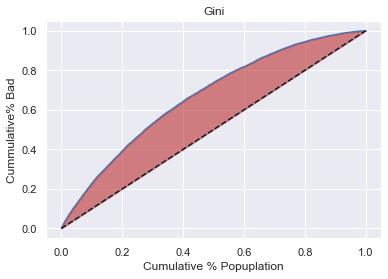

In [356]:
plt.plot(df_actual_predicted_probs['Cumulative perc Population'], df_actual_predicted_probs['Cummulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative perc Population'], df_actual_predicted_probs['Cumulative perc Population'],linestyle ='--', color = 'k')
plt.fill_between(df_actual_predicted_probs['Cumulative perc Population'], df_actual_predicted_probs['Cummulative Perc Bad'],df_actual_predicted_probs['Cumulative perc Population'], alpha = 0.7, color = 'r')

plt.xlabel('Cumulative % Popuplation')
plt.ylabel('Cummulative% Bad')
plt.title('Gini')



Gini = AUROC *2 - 1 

In [357]:
AUROC*2 -1 

0.37842204962821735

#### (2) Kolmogorov-Smirnov coefficient
The maximum difference between the cumulative distribution functions of 'good' and 'bad'borrowers

Text(0.5, 1.0, 'Kolmogorov-Simirnov')

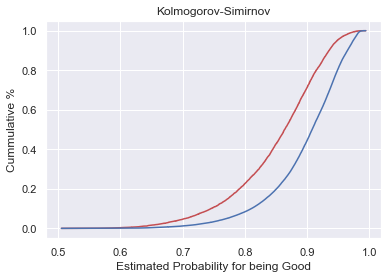

In [363]:
plt.plot(df_actual_predicted_probs['y_hat_testProba'], df_actual_predicted_probs['Cummulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_testProba'], df_actual_predicted_probs['Cummulative Perc Good'], color = 'b')

plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cummulative %')
plt.title('Kolmogorov-Simirnov')

It shows that the two cumulative distribution functions are sufficiently far away from each other and the model has satisfactory predictive power

In [371]:
KS = max (df_actual_predicted_probs['Cummulative Perc Bad'] - df_actual_predicted_probs['Cummulative Perc Good'])
KS

0.2743598901264102

## Apply the PD Model

### Calculating PD of individual accounts

Turn the PD Model into a score card and calculates PD:    
Use 0 for reference categories

#### (1) pre-processing

In [413]:
summary_table

,Feature name,Coefficient,p_values
0,Intercept,-0.084405,NaN
1,grade_A,2.176299,0.000000e+00
2,grade_B,1.450940,0.000000e+00
3,grade_C,0.994351,7.001591e-178
4,grade_D,0.653780,3.278514e-79
5,grade_E,0.367792,1.751996e-25
6,grade_F,0.126697,1.115266e-03
7,home_ownership_OWN,0.097230,1.150219e-06
8,home_ownership_MORTGAGE,0.195281,5.557711e-59
9,addr_state:NM_VA,0.086599,6.200566e-03


In [417]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficient'] = 0
df_ref_categories['p_values'] = np.nan

In [418]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()

In [419]:
df_scorecard

,index,Feature name,Coefficient,p_values
0,0,Intercept,-0.084405,NaN
1,1,grade_A,2.176299,0.000000e+00
2,2,grade_B,1.450940,0.000000e+00
3,3,grade_C,0.994351,7.001591e-178
4,4,grade_D,0.653780,3.278514e-79
5,5,grade_E,0.367792,1.751996e-25
6,6,grade_F,0.126697,1.115266e-03
7,7,home_ownership_OWN,0.097230,1.150219e-06
8,8,home_ownership_MORTGAGE,0.195281,5.557711e-59
9,9,addr_state:NM_VA,0.086599,6.200566e-03


In [455]:
df_scorecard['Feature name']= df_scorecard['Feature name'].replace(['purpose_debt_consolidation'],['purpose:debt_consolidation'])

In [456]:
df_scorecard['Original feature name']= df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficient,p_values,Original feature name
0,0,Intercept,-0.084405,NaN,Intercept
1,1,grade:A,2.176299,0.000000e+00,grade
2,2,grade:B,1.450940,0.000000e+00,grade
3,3,grade:C,0.994351,7.001591e-178,grade
4,4,grade:D,0.653780,3.278514e-79,grade
5,5,grade:E,0.367792,1.751996e-25,grade
6,6,grade:F,0.126697,1.115266e-03,grade
7,7,home_ownership:OWN,0.097230,1.150219e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.195281,5.557711e-59,home_ownership
9,9,addr_state:NM_VA,0.086599,6.200566e-03,addr_state


#### (2) Create score card
Minimum score = 300
Maximum score = 850

In [423]:
min_score = 300
max_score = 850

In [457]:
df_scorecard.groupby('Original feature name')['Coefficient'].min()

Original feature name
Intercept             -0.084405
addr_state             0.000000
annual_inc            -0.296787
emp_length             0.000000
grade                  0.000000
home_ownership         0.000000
initial_list_status    0.000000
mths_since_issue_d    -0.107179
purpose                0.000000
term                   0.000000
verification_status   -0.016262
Name: Coefficient, dtype: float64

In [459]:
min_sum_coef =df_scorecard.groupby('Original feature name')['Coefficient'].min().sum()
min_sum_coef

-0.504632250310939

In [460]:
df_scorecard.groupby('Original feature name')['Coefficient'].max()

Original feature name
Intercept             -0.084405
addr_state             0.545838
annual_inc             0.847604
emp_length             0.340168
grade                  2.176299
home_ownership         0.195281
initial_list_status    0.055909
mths_since_issue_d     1.099293
purpose                0.250596
term                   0.019402
verification_status    0.040757
Name: Coefficient, dtype: float64

In [461]:
max_sum_coef =df_scorecard.groupby('Original feature name')['Coefficient'].max().sum()
max_sum_coef

5.486743937279118

#### (3) Convert coeff into scores:     
$ variable\_score = variable\_coef \frac{(max\_score-min\_score)}{(max\_sum\_coeff-min\_sum\_coeff)}$

In [462]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficient']*(max_score- min_score)/(max_sum_coef-min_sum_coef)

In [465]:
df_scorecard

,index,Feature name,Coefficient,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.084405,NaN,Intercept,-7.748225
1,1,grade:A,2.176299,0.000000e+00,grade,199.781260
2,2,grade:B,1.450940,0.000000e+00,grade,133.194263
3,3,grade:C,0.994351,7.001591e-178,grade,91.280018
4,4,grade:D,0.653780,3.278514e-79,grade,60.016103
5,5,grade:E,0.367792,1.751996e-25,grade,33.762793
6,6,grade:F,0.126697,1.115266e-03,grade,11.630596
7,7,home_ownership:OWN,0.097230,1.150219e-06,home_ownership,8.925576
8,8,home_ownership:MORTGAGE,0.195281,5.557711e-59,home_ownership,17.926506
9,9,addr_state:NM_VA,0.086599,6.200566e-03,addr_state,7.949645


In [470]:
# deal with intercept
df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficient'][0]-min_sum_coef)/(max_sum_coef - min_sum_coef)* (max_score -min_score)+ min_score

<ipython-input-470-c70cc8fe538c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficient'][0]-min_sum_coef)/(max_sum_coef - min_sum_coef)* (max_score -min_score)+ min_score


In [471]:
df_scorecard

,index,Feature name,Coefficient,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.084405,NaN,Intercept,338.576313
1,1,grade:A,2.176299,0.000000e+00,grade,199.781260
2,2,grade:B,1.450940,0.000000e+00,grade,133.194263
3,3,grade:C,0.994351,7.001591e-178,grade,91.280018
4,4,grade:D,0.653780,3.278514e-79,grade,60.016103
5,5,grade:E,0.367792,1.751996e-25,grade,33.762793
6,6,grade:F,0.126697,1.115266e-03,grade,11.630596
7,7,home_ownership:OWN,0.097230,1.150219e-06,home_ownership,8.925576
8,8,home_ownership:MORTGAGE,0.195281,5.557711e-59,home_ownership,17.926506
9,9,addr_state:NM_VA,0.086599,6.200566e-03,addr_state,7.949645


In [472]:
# We prefer integer score for easier interpretation

df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

In [473]:
# check if min and max scores are as expected
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min()

Original feature name
Intercept              339.0
addr_state              50.0
annual_inc              78.0
emp_length              31.0
grade                  200.0
home_ownership          18.0
initial_list_status      5.0
mths_since_issue_d     101.0
purpose                 23.0
term                     2.0
verification_status      4.0
Name: Score - Preliminary, dtype: float64

In [474]:
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()

301.0

In [475]:
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max()

Original feature name
Intercept              339.0
addr_state              50.0
annual_inc              78.0
emp_length              31.0
grade                  200.0
home_ownership          18.0
initial_list_status      5.0
mths_since_issue_d     101.0
purpose                 23.0
term                     2.0
verification_status      4.0
Name: Score - Preliminary, dtype: float64

In [476]:
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

851.0

In [478]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficient,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.084405,NaN,Intercept,338.576313,339.0,0.423687
1,1,grade:A,2.176299,0.000000e+00,grade,199.781260,200.0,0.218740
2,2,grade:B,1.450940,0.000000e+00,grade,133.194263,133.0,-0.194263
3,3,grade:C,0.994351,7.001591e-178,grade,91.280018,91.0,-0.280018
4,4,grade:D,0.653780,3.278514e-79,grade,60.016103,60.0,-0.016103
5,5,grade:E,0.367792,1.751996e-25,grade,33.762793,34.0,0.237207
6,6,grade:F,0.126697,1.115266e-03,grade,11.630596,12.0,0.369404
7,7,home_ownership:OWN,0.097230,1.150219e-06,home_ownership,8.925576,9.0,0.074424
8,8,home_ownership:MORTGAGE,0.195281,5.557711e-59,home_ownership,17.926506,18.0,0.073494
9,9,addr_state:NM_VA,0.086599,6.200566e-03,addr_state,7.949645,8.0,0.050355


In [502]:
#adjust the error due to round up

df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][23] = -2.0
df_scorecard['Score - Final'][1] = 199

<ipython-input-502-370592625f27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][23] = -2.0
<ipython-input-502-370592625f27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][1] = 199


In [504]:
df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()

300.0

In [505]:
df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

850.0

### Calculating Credit Score

In [506]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [507]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)

In [531]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state: KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status: Not Verified,verification_status_Source Verified,verification_status:Verified,purpose:educ_sm_b_wedd_ren_en_mov_house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0.0,emp_length:1.0,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10.0,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [533]:
inputs_test_with_ref_cat_w_intercept.rename(columns ={'verification_status_Source Verified':'verification_status:Source Verified'}, inplace = True)

In [534]:
#remove referecence columns
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [535]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state: KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status: Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1.0,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10.0,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ_sm_b_wedd_ren_en_mov_house,initial_list_status:f,term:60,emp_length:0.0,mths_since_issue_d:>84,annual_inc:<20K
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [540]:
scorecard_scores = df_scorecard['Score - Final']

In [537]:
#check shape matches 
inputs_test_with_ref_cat_w_intercept.shape

(93257, 63)

In [543]:
scorecard_scores = scorecard_scores.values.reshape(63,1)

In [545]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
362514,576.0
288564,541.0
213591,485.0
263083,602.0
165001,619.0


### From Credit Score to PD

$sum\_coef\_score = \frac{total\_score - min\_score}{max\_score - min\_score}(max\_sum\_coef - min\_sum\_coef) + min\_sum\_coef$

In [554]:
sum_coef_from_score = ((y_scores-min_score)/(max_score-min_score))*(max_sum_coef-min_sum_coef) + min_sum_coef

The probability from score is not exactly the same as previously calculated probabilities due to the round process

In [555]:
y_hat_proba_from_score = np.exp(sum_coef_from_score)/(np.exp(sum_coef_from_score)+1)
y_hat_proba_from_score.head()

,0
362514,0.924278
288564,0.892897
213591,0.819157
263083,0.941870
165001,0.951217


In [556]:
y_hat_test_proba[0:5]

array([0.9243, 0.8927, 0.8179, 0.9419, 0.9511])

### Set Cut-Offs

1. Once the cut-off is chosen, it predetermines the total number of borrowers that will be approved and rejected. 


2. Impacts the quality of loans

#### (1) Use ROC Curve to determine Cut-offs

Text(0.5, 1.0, 'ROC curve')

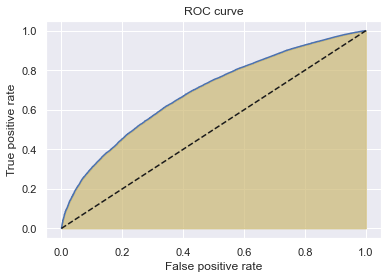

In [563]:
plt.plot(fpr,tpr)
plt.fill_between(fpr, tpr, alpha = 0.7, color = 'y')
plt.plot(fpr,fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [589]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds),pd.DataFrame(fpr),pd.DataFrame(tpr)],axis = 1)

In [590]:
df_cutoffs.columns = ['thresholds','fpr','tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.994085,0.0,0.000000
1,0.994085,0.0,0.000012
2,0.989262,0.0,0.000217
3,0.989216,0.0,0.000241
4,0.989039,0.0,0.000277


In [591]:
df_cutoffs['thresholds'][0] = 1- 1/np.power(10,16)

In [594]:
df_cutoffs['score'] = ((np.log(df_cutoffs['thresholds']/(1-df_cutoffs['thresholds'])) - min_sum_coef)*(max_score-min_score)/(max_sum_coef-min_sum_coef)+ min_score).round()
df_cutoffs['score'][0] = max_score

In [595]:
df_cutoffs.head()

,thresholds,fpr,tpr,score
0,1.000000,0.0,0.000000,850.0
1,0.994085,0.0,0.000012,817.0
2,0.989262,0.0,0.000217,762.0
3,0.989216,0.0,0.000241,761.0
4,0.989039,0.0,0.000277,760.0


In [596]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_testProba']>=p,1,0).sum()

In [597]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_testProba'].shape[0]-df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved']/ df_actual_predicted_probs['y_hat_testProba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [598]:
df_cutoffs.tail()

,thresholds,fpr,tpr,score,N Approved,N Rejected,Approval Rate,Rejection Rate
32685,0.541331,0.999706,0.999976,362.0,93252,5,0.999946,0.000054
32686,0.540520,0.999706,0.999988,361.0,93253,4,0.999957,0.000043
32687,0.521099,0.999902,0.999988,354.0,93255,2,0.999979,0.000021
32688,0.506509,0.999902,1.000000,349.0,93256,1,0.999989,0.000011
32689,0.505159,1.000000,1.000000,348.0,93257,0,1.000000,0.000000


In [603]:
df_cutoffs.iloc[15000:15500,:]

,thresholds,fpr,tpr,score,N Approved,N Rejected,Approval Rate,Rejection Rate
15000,0.904802,0.255054,0.521194,553.0,45893,47364,0.492113,0.507887
15001,0.904798,0.255054,0.521218,553.0,45895,47362,0.492135,0.507865
15002,0.904785,0.255054,0.521266,553.0,45899,47358,0.492178,0.507822
15003,0.904783,0.255152,0.521278,553.0,45901,47356,0.492199,0.507801
15004,0.904783,0.255152,0.521314,553.0,45904,47353,0.492231,0.507769
15005,0.904781,0.255152,0.521326,553.0,45905,47352,0.492242,0.507758
15006,0.904778,0.255152,0.521374,553.0,45909,47348,0.492285,0.507715
15007,0.904769,0.255152,0.521447,553.0,45915,47342,0.492349,0.507651
15008,0.904759,0.255250,0.521447,553.0,45916,47341,0.492360,0.507640
15009,0.904755,0.255250,0.521471,553.0,45918,47339,0.492381,0.507619


In [601]:
df_scorecard.to_csv('daf_scorecard.csv')